In [23]:
import torch
from torchvision import transforms

from PIL import Image
from jupyter_compare_view import compare

from depth4mc.model.D4MCModel import D4MCModel
from depth4mc.dataset.D4MCDataset import DEFAULT_TRANSFORM
from depth4mc.dataset.dataset_maker.convert_to_dataset import to_depth_far

Jupyter compare_view v0.2.4


In [3]:
DEVICE = 'cpu'

checkpoint_path = '../training/results/checkpoints/model_e0000.pth'

In [6]:
model = D4MCModel()
model.load_state_dict(torch.load(checkpoint_path, weights_only=True))
model = model.to(DEVICE).eval()

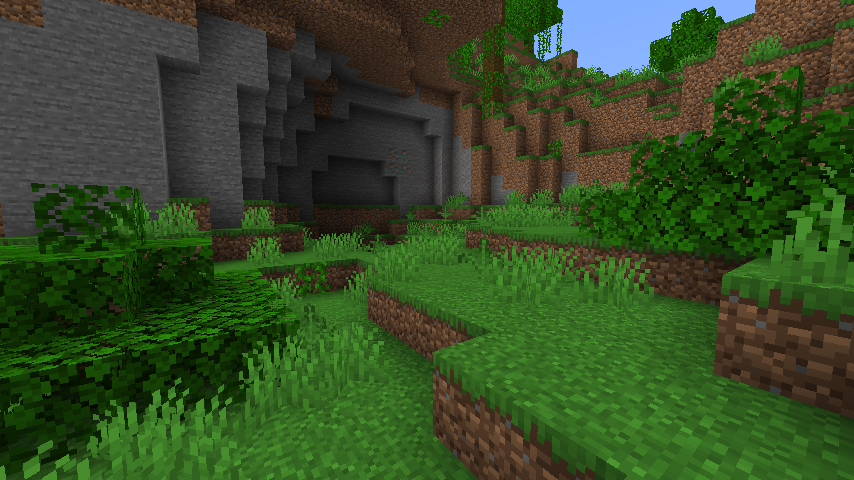

In [9]:
screenshot = Image.open('../dataset/data/screenshots/00008640.png').convert('RGB')
input = DEFAULT_TRANSFORM(screenshot)

display(screenshot)

In [16]:
with torch.no_grad():
    output = model(input[None])[0]
print(output.shape)

torch.Size([480, 854])


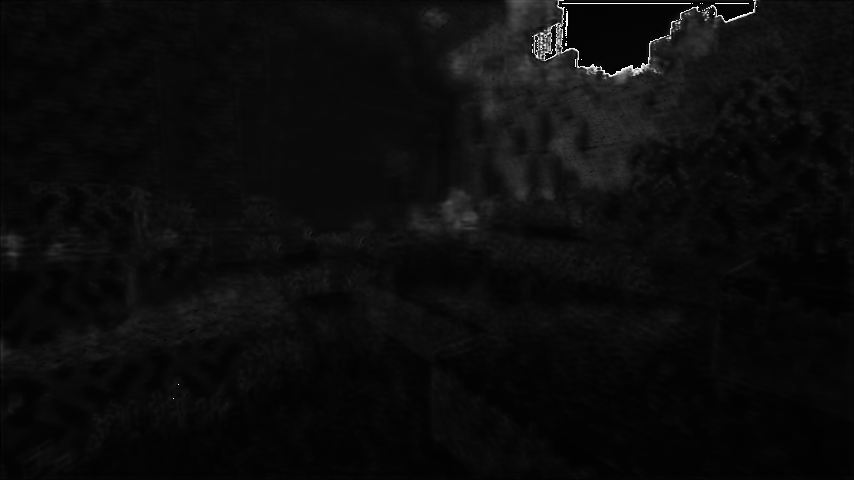

In [22]:
output_depth = transforms.functional.to_pil_image(output / to_depth_far(255))
display(output_depth)


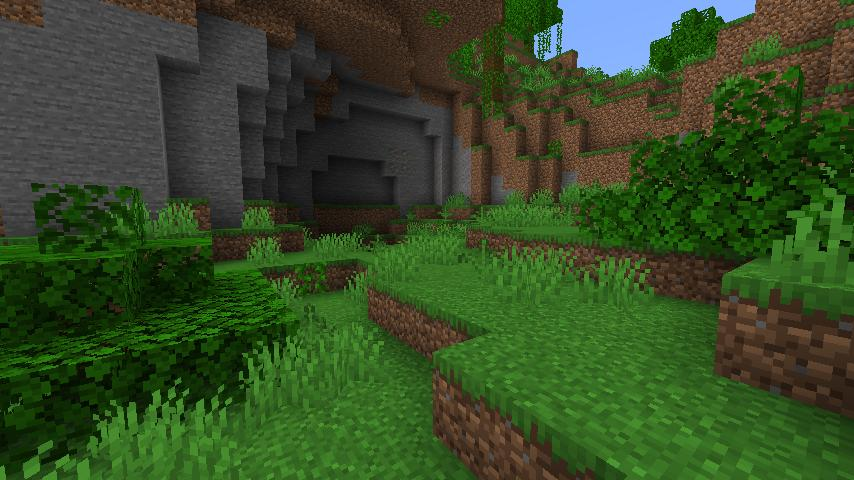
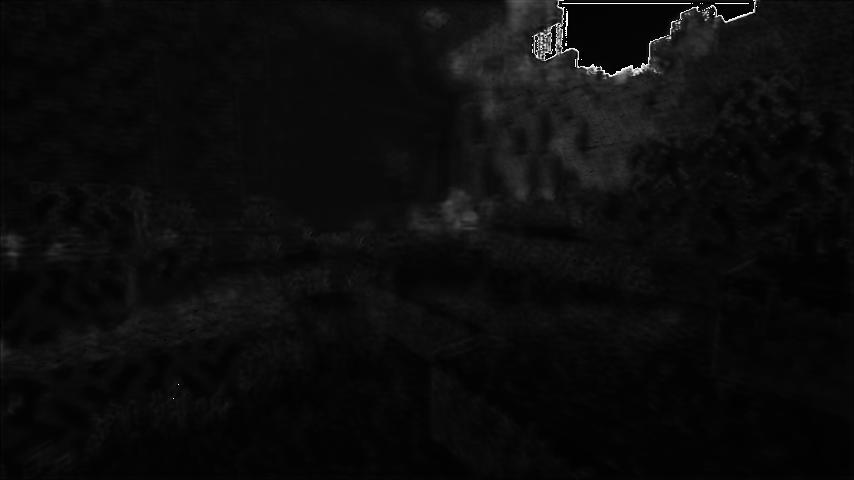

In [26]:
compare(screenshot, output_depth, cmap="gray", start_mode="horizontal", start_slider_pos=0.75)